In [8]:
import os
import glob

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
files = glob.glob("trained_model/20221223/*")
files.sort()
files

['trained_model/20221223/z0_0.000000_seed_1',
 'trained_model/20221223/z0_0.000500_seed_1',
 'trained_model/20221223/z0_0.001000_seed_1']

In [6]:
evals = []
for path in files:
    model = tf.keras.models.load_model(path)
    evals.append(model.evaluate(x_test, y_test))

313/313 [==============================] - 4s 12ms/step - loss: 1.1379 - accuracy: 0.6948


# フォトマスクから1層目までの距離の違いによる正解率の変化
z0=フォトマスクから1層目までの距離

Text(0, 0.5, 'Accuracy')

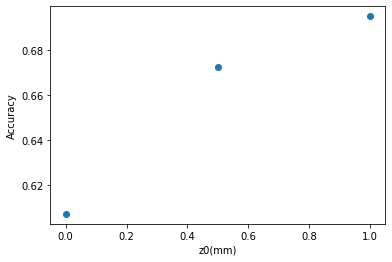

In [16]:
z = np.array([0, 0.5e-3, 1.0e-3])
plt.scatter(z*1000, np.array(evals)[:,1])
plt.xlabel("z0(mm)")
plt.ylabel("Accuracy")

## フォトマスクと1層目までの距離=0の磁区パターン

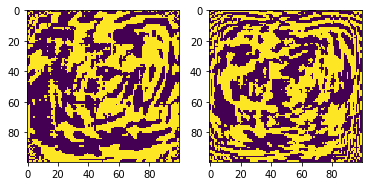

In [32]:
model = tf.keras.models.load_model("trained_model/20221223/z0_0.000000_seed_1")
w1 = model.layers[3].get_weights()
b_w1 = tf.clip_by_value((w1[0]+1.)/2.,0, 1)
b_w1 = 2.*tf.round(b_w1)-1.

w2 = model.layers[5].get_weights()
b_w2 = tf.clip_by_value((w2[0]+1.)/2.,0, 1)
b_w2 = 2.*tf.round(b_w2)-1.

plt.subplot(121)
plt.imshow(b_w1, interpolation="none")

plt.subplot(122)
plt.imshow(b_w2, interpolation="none")

## フォトマスクと1層目までの距離=0.5mmの磁区パターン

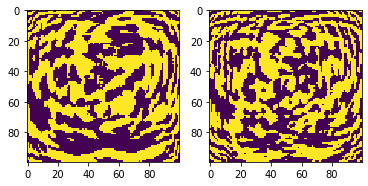

In [36]:
model = tf.keras.models.load_model("trained_model/20221223/z0_0.000500_seed_1")
w1 = model.layers[4].get_weights()
b_w1 = tf.clip_by_value((w1[0]+1.)/2.,0, 1)
b_w1 = 2.*tf.round(b_w1)-1.

w2 = model.layers[6].get_weights()
b_w2 = tf.clip_by_value((w2[0]+1.)/2.,0, 1)
b_w2 = 2.*tf.round(b_w2)-1.

plt.subplot(121)
plt.imshow(b_w1, interpolation="none")

plt.subplot(122)
plt.imshow(b_w2, interpolation="none")

## フォトマスクと1層目までの距離=0.5mmの磁区パターン

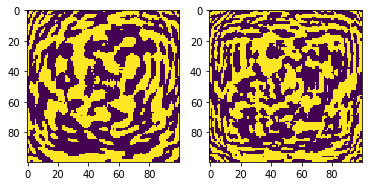

In [37]:
model = tf.keras.models.load_model("trained_model/20221223/z0_0.001000_seed_1")
w1 = model.layers[4].get_weights()
b_w1 = tf.clip_by_value((w1[0]+1.)/2.,0, 1)
b_w1 = 2.*tf.round(b_w1)-1.

w2 = model.layers[6].get_weights()
b_w2 = tf.clip_by_value((w2[0]+1.)/2.,0, 1)
b_w2 = 2.*tf.round(b_w2)-1.

plt.subplot(121)
plt.imshow(b_w1, interpolation="none")

plt.subplot(122)
plt.imshow(b_w2, interpolation="none")